# Métodos computacionales 
## Taller 2
### Integrantes: 
### - Gabriel Ardila
### - Olga Londoño

In [2]:
# Librerías
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc
import scipy as sc
from scipy.interpolate import lagrange
import sympy as sym
from sympy import *
from sympy import Symbol, N
import urllib.request
import pandas as pd
import math
from sympy import symbols, integrate, legendre, S

### 1. Derivación (8)

C:\Users\SOFALO~1\AppData\Local\Temp/ipykernel_23272/3801082556.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.tan(x))
C:\Users\SOFALO~1\AppData\Local\Temp/ipykernel_23272/3801082556.py:9: RuntimeWarning: invalid value encountered in sqrt
  return 1/(2*(np.sqrt(np.tan(x)))*(np.cos(x)**2))
C:\Users\SOFALO~1\AppData\Local\Temp/ipykernel_23272/3801082556.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(2*(np.sqrt(np.tan(x)))*(np.cos(x)**2))


Text(0.5, 1.0, 'Derivada central')

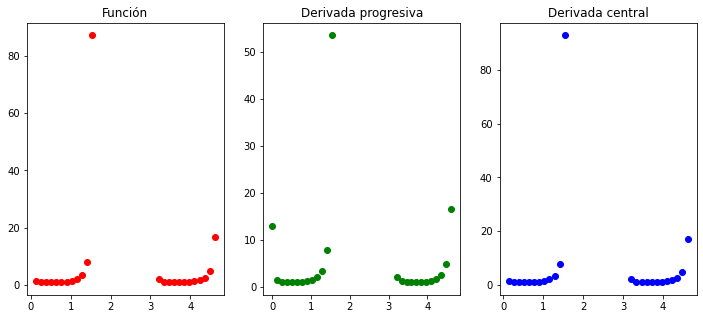

In [34]:
# a, b y e en pdf "Soluciones teóricas"
# c)
h=0.01

def Function(x):
    return np.sqrt(np.tan(x))

def EDerivate(x):
    return 1/(2*(np.sqrt(np.tan(x)))*(np.cos(x)**2))

def RightDerivative(f,x,h):
    d = 0.
    if h != 0:
        d = (1/(2*h))*(-3*f(x)+4*f(x+h)-f(x+2*h))
    return d

RD=RightDerivative(Function,0.1,h) # Retorna: 1.5577418209431482

# d)
def CentralDerivative(f,x,h):
    d = 0.    
    if h != 0:
        d = (f(x+h) - f(x-h))/(2*h)        
    return d

CD=CentralDerivative(Function,0.1,h) 
# e)
x=np.linspace(0,2*np.pi,50)
rd=RightDerivative(Function,x,h)
cd=CentralDerivative(Function,x,h)

fig, axs = plt.subplots(1, 3,figsize=(12,5))
axs[0].scatter(x, EDerivate(x),color="red")
axs[0].set_title("Función")
axs[1].scatter(x, rd,color="green")
axs[1].set_title("Derivada progresiva")
axs[2].scatter(x, cd,color="blue")
axs[2].set_title("Derivada central")

C:\Users\SOFALO~1\AppData\Local\Temp/ipykernel_23272/3801082556.py:9: RuntimeWarning: invalid value encountered in sqrt
  return 1/(2*(np.sqrt(np.tan(x)))*(np.cos(x)**2))
C:\Users\SOFALO~1\AppData\Local\Temp/ipykernel_23272/3801082556.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(2*(np.sqrt(np.tan(x)))*(np.cos(x)**2))


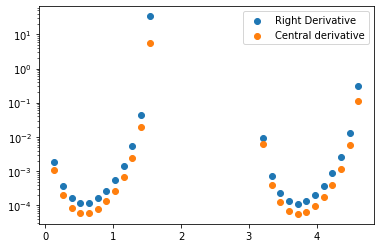

In [35]:
# f)
plt.scatter(x,np.abs(EDerivate(x)-rd),label='Right Derivative')
plt.scatter(x,np.abs(EDerivate(x)-cd),label='Central derivative')
plt.yscale('log')
plt.legend()

### 2. Raíces de polinomios (5)

In [36]:
x = symbols('x')
def rodrigues(n):
    return expand((1/factorial(n))*(diff(exp(-x)*x**n, x, n)))
roots=[]
for i in range(20):
    L = laguerre(i,x)
    r = solve(L, x)
    roots.append(r)
    roots=[root for root in r if root.is_real]

print ([N(solution) for solution in roots])

[0.0741587837572051, 0.391268613319995, 0.963957343997958, 1.79617558206833, 2.89365138187378, 4.26421553962777, 5.91814156164405, 7.86861891533473, 10.1324237168153, 12.7308814638424, 15.6912783398359, 19.0489932098235, 22.8508497608295, 27.1606693274114, 32.0691222518622, 37.7129058012196, 44.3173627958315, 52.3129024574044, 62.8024231535004]


### 3. Interpolación de Lagrange (1)
Se encuentra en el pdf "Soluciones teóricas"

### 3. Interpolación de Lagrange (4)

In [37]:
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv"
filename="Parabolico.csv"
urllib.request.urlretrieve(url,filename)
df = pd.read_csv('Parabolico.csv')
x=df['X'].tolist()
y=df['Y'].tolist()
p = lagrange(x, y)
dp = p.deriv()
v0 = ((1 + dp(0)**2)**0.5) / 0.1
theta = math.degrees(math.atan(dp(0)))

print("Magnitud de la velocidad inicial: "+str(int(v0))+"m/s")
print("Ángulo de lanzamiento: "+str(round(theta))+"º")

Magnitud de la velocidad inicial: 10m/s
Ángulo de lanzamiento: 20º


### 3. Interpolación de Lagrange (5)

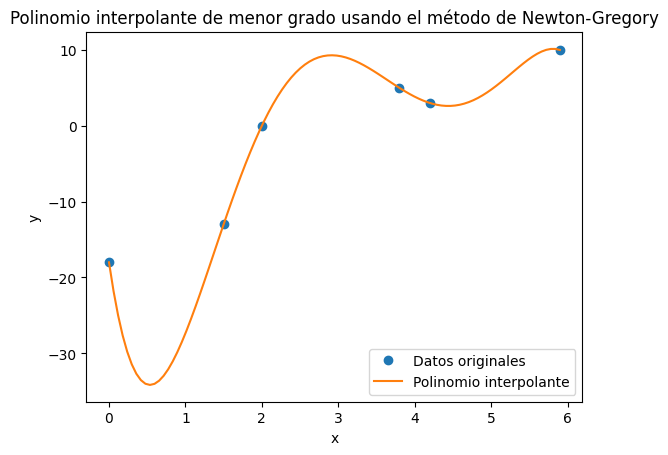

In [3]:
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv"
filename="InterpolacionNewtonNoequi.csv"
urllib.request.urlretrieve(url,filename)
df = pd.read_csv('InterpolacionNewtonNoequi.csv')
x=df['X'].tolist()
y=df['Y'].tolist()
tabla = np.zeros([len(x), len(x)])
tabla[:,0] = y

for j in range(1, len(x)):
    for i in range(len(x)-j):
        tabla[i][j] = (tabla[i+1][j-1] - tabla[i][j-1]) / (x[i+j] - x[i])
polinomio = np.zeros(len(x))

for i in range(len(x)):
    prod = 1
    for j in range(i):
        prod *= (x[i] - x[j])
    polinomio += tabla[0][i] * prod
x_range = np.linspace(x[0], x[-1], 100)
y_range = np.zeros(len(x_range))

for i in range(len(x)):
    prod = 1
    for j in range(i):
        prod *= (x_range - x[j])
    y_range += tabla[0][i] * prod
plt.plot(x, y, 'o', label='Datos originales')
plt.plot(x_range, y_range, label='Polinomio interpolante')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio interpolante de menor grado usando el método de Newton-Gregory')
plt.show()

### 4. Integración (1)
Se encuentra en el pdf "Soluciones teóricas"

### 4. Integración (3)
Se encuentra en el pdf "Soluciones teóricas"

### 4. Integración (7)

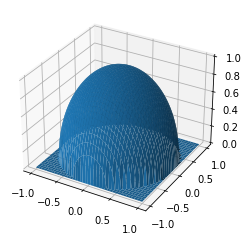

In [38]:
#a)
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)
a = 0.
b = x[-1]
R = 1
def f(x,y,R=1.):
    z = R**2 - x**2 - y**2
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)
f = np.vectorize(f)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)


### 4. Integración (14)

In [63]:
x = symbols('x')
p = 3 + 5*x + x**2
p0 = legendre(0, x)
p1 = legendre(1, x)
p2 = legendre(2, x)
a0 = integrate(p * p0, (x, -1, 1)) / S(2)
a1 = integrate(p * p1, (x, -1, 1)) / S(2)
a2 = integrate(p * p2, (x, -1, 1)) / S(2)


# Escribir el polinomio en la base de Legendre
p_legendre = "p(x) = " + str(a0) +"p0 + " + str(a1) + "p1 + " + str(a2) + "p2"

# Imprimir el polinomio en la base de Legendre
print(p_legendre)

p(x) = 10/3p0 + 5/3p1 + 2/15p2


### 4. Integración (17)

### 4. Integración (18)

### 4. Integración (19)